# 🌳 Entrenamiento del Modelo: Random Forest

Este notebook tiene como objetivo entrenar un modelo de Random Forestpara la predicción de precios de propiedades en Argentina. Es conocido por su capacidad para capturar relaciones no lineales y su robustez.

In [1]:
!git clone https://github.com/joseigmartinez/proyecto-properati-unicaba2025

Cloning into 'proyecto-properati-unicaba2025'...
remote: Enumerating objects: 13, done.
remote: Counting objects: 100% (13/13), done.
remote: Compressing objects: 100% (11/11), done.
remote: Total 13 (delta 2), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (13/13), 993.53 KiB | 3.75 MiB/s, done.
Resolving deltas: 100% (2/2), done.


In [2]:
!ls

proyecto-properati-unicaba2025	sample_data


In [3]:
%cd proyecto-properati-unicaba2025

/content/proyecto-properati-unicaba2025


In [4]:
!ls

preprocesamiento.ipynb	properati_clean.csv  README.md


In [5]:
### Importación de Librerías
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import os

In [ ]:
#####################################################################
## FUNCIÓN PARA GUARDAR MÉTRICAS
#####################################################################
def guardar_metricas(modelo_nombre, rmse, mae, r2, filename='metricas_entrenamiento_rforest.csv'):
    """Crea o añade una fila al CSV de métricas."""

    # Creamos un DataFrame con las métricas de la ejecución actual
    metricas = pd.DataFrame({
        'modelo': [modelo_nombre],
        'fecha_ejecucion': [pd.Timestamp.now()],
        'RMSE': [rmse],
        'MAE': [mae],
        'R2': [r2]
    })

    # Modo de guardado: 'a' (append) para añadir, 'w' (write) para crear/sobrescribir
    if not os.path.exists(filename):
        # Si no existe, lo crea con encabezados
        metricas.to_csv(filename, index=False, header=True)
        print(f"  > Archivo de métricas creado en '{filename}'.")
    else:
        # Si existe, añade la nueva fila sin encabezados
        metricas.to_csv(filename, mode='a', index=False, header=False)
        print(f"  > Métricas añadidas a '{filename}'.")

In [6]:
#####################################################################
## 1. Carga de Datos y Preparación
#####################################################################
#Cargamos el dataset limpio y definimos las variables predictoras (X) y la variable objetivo (Y).
#Es el mismo proceso de preparación que en el modelo Lineal.

# Definimos las columnas a utilizar:
TARGET = 'price'
FEATURES = ['surface_total', 'rooms', 'bathrooms']

# Carga del dataset limpio
try:
    # Se asume que properati_clean.csv está en el mismo directorio
    df = pd.read_csv('properati_clean.csv')
    print(f"Dataset cargado correctamente. Filas: {len(df)}")
except FileNotFoundError:
    print("ERROR: Asegúrate de que 'properati_clean.csv' esté en el mismo directorio.")
    exit()

# 1. Separación de X e Y
X = df[FEATURES]
y = df[TARGET]

# 2. División en conjuntos de entrenamiento y prueba (80% / 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"\nConjunto de entrenamiento (X_train): {X_train.shape}")
print(f"Conjunto de prueba (X_test): {X_test.shape}")

Dataset cargado correctamente. Filas: 102158

Conjunto de entrenamiento (X_train): (81726, 3)
Conjunto de prueba (X_test): (20432, 3)


In [7]:
#####################################################################
## 2. Entrenamiento del Modelo Random Forest Regressor
#####################################################################
#El Random Forest opera construyendo múltiples árboles de decisión y promediando sus predicciones.

# Inicialización y entrenamiento del modelo
modelo_rforest = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
modelo_rforest.fit(X_train, y_train)

# Predicciones sobre el conjunto de prueba
y_pred_rforest = modelo_rforest.predict(X_test)

print("✅ Modelo Random Forest entrenado.")

✅ Modelo Random Forest entrenado.


In [8]:
###Evaluación y Métricas
#####################################################################
## 3. Evaluación del Modelo: Métricas de Regresión
#####################################################################
#Evaluamos el rendimiento del modelo utilizando tres métricas clave: RMSE, MAE y R². El Random Forest generalmente debería mostrar un mejor rendimiento.

### Explicación RMSE - Error Cuadrático Medio de la Raíz (RMSE)
# Es la raíz cuadrada del promedio de los errores al cuadrado. Está en las mismas unidades que el precio de la propiedad (USD).
# Nos da la magnitud del error promedio, con una fuerte penalización por los errores más grandes (outliers). Un valor menor es mejor.

### Explicación MAE - Error Absoluto Medio (MAE)
# Es el promedio de la magnitud de los errores absolutos. Es el error promedio más directo.
# Representa el error promedio absoluto en USD. Si el MAE es bajo, significa que las predicciones del modelo están consistentemente cerca del precio real. Un valor menor es mejor.

### Explicación R² - Coeficiente de Determinación (R² o R-cuadrado)
# Mide la proporción de la varianza en la variable dependiente ($Y$) que es explicada por el modelo. Su valor varía de 0 a 1.
# Un R² cercano a 1 indica que el modelo explica una gran parte de la variabilidad de los precios. Esperamos que el Random Forest tenga un R² mayor que el modelo Lineal.

### Cálculo de Métricas
rmse = np.sqrt(mean_squared_error(y_test, y_pred_rforest))
mae = mean_absolute_error(y_test, y_pred_rforest)
r2 = r2_score(y_test, y_pred_rforest)

# Impresión de resultados
print("\n--- Métricas del Modelo Random Forest ---")
print(f"RMSE (Raíz del Error Cuadrático Medio): {rmse:,.2f} USD")
print(f"MAE (Error Absoluto Medio): {mae:,.2f} USD")
print(f"R² (Coeficiente de Determinación): {r2:.4f}")
print("------------------------------------------")


--- Métricas del Modelo Random Forest ---
RMSE (Raíz del Error Cuadrático Medio): 123,278.22 USD
MAE (Error Absoluto Medio): 81,878.48 USD
R² (Coeficiente de Determinación): 0.2951
------------------------------------------


In [ ]:
# 3. Guardar las métricas en el archivo consolidado
guardar_metricas(
    modelo_nombre='Random_Forest',
    rmse=rmse,
    mae=mae,
    r2=r2
)

In [9]:
#####################################################################
## 4. Guardado de Resultados para BBDD
#####################################################################
#Guardamos los precios reales y las predicciones del modelo en un archivo CSV para su posterior carga en una base de datos.

### Guardar CSV
# Creamos un DataFrame con los resultados
resultados = pd.DataFrame({
    'id_registro': X_test.index,
    #Usamos el índice para identificar el registro original
    'precio_real': y_test,
    'prediccion_rforest': y_pred_rforest
})

# Guardamos el DataFrame como .csv
output_filename = 'resultados_rforest.csv'
resultados.to_csv(output_filename, index=False)

print(f"✅ Resultados de Random Forest guardados en '{output_filename}'")

✅ Resultados de Random Forest guardados en 'resultados_rforest.csv'


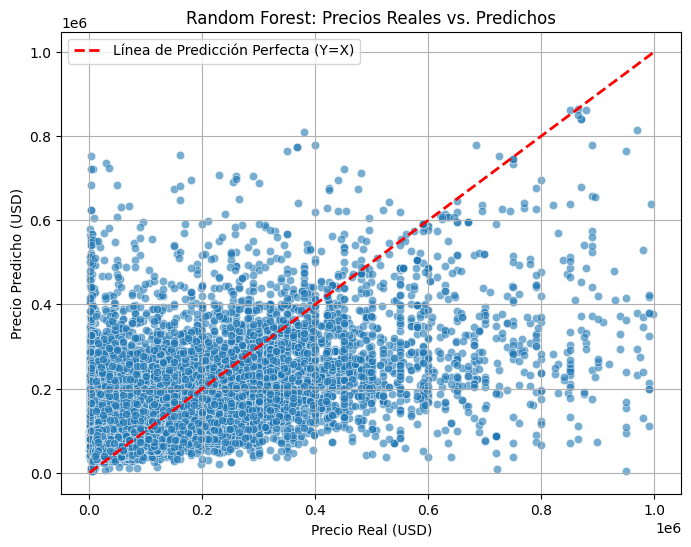

In [10]:
#####################################################################
## 5. Visualización del Rendimiento
#####################################################################
#Para evaluar la calidad de las predicciones de este modelo, graficamos los precios reales (price_real) contra los precios predichos (prediccion_rforest) en el conjunto de prueba.

### Generación del Gráfico Real vs Predicho
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
# Gráfico de dispersión de Precios Reales vs. Prediccion
sns.scatterplot(x=resultados['precio_real'], y=resultados['prediccion_rforest'], alpha=0.6)

# Línea de referencia (donde Predicción = Real)
max_val = resultados[['precio_real', 'prediccion_rforest']].max().max()
plt.plot([0, max_val], [0, max_val], color='red', linestyle='--', linewidth=2, label='Línea de Predicción Perfecta (Y=X)')

plt.title('Random Forest: Precios Reales vs. Predichos')
plt.xlabel('Precio Real (USD)')
plt.ylabel('Precio Predicho (USD)')
plt.legend()
plt.grid(True)
plt.show()

### Interpretación del Gráfico de Dispersión

# Línea Roja (Y=X): Esta línea representa la predicción perfecta, donde la predicción del modelo coincide exactamente con el precio real.
# Puntos Azules: Cada punto es una propiedad en el conjunto de prueba.
# Explicacion -> La cercanía de los puntos azules a la línea roja indica la precisión del modelo.
#Si el modelo Random Forest es más preciso que el Lineal, deberiamos ver una dispersión de puntos más estrecha alrededor de la línea roja
#especialmente en el rango de precios más altos.
#Los puntos dispersos indican áreas donde el modelo tiene dificultades para predecir el precio.